# Non normal network and transient response
## Introduction: Where eigen-analysis breaks down

Consider an evolution equation of the form $$\dot{\boldsymbol{x}}=\boldsymbol{A}\boldsymbol{x}$$ where $$\boldsymbol{A}=\begin{pmatrix}-1 & 500\\
0 & -2
\end{pmatrix}$$

The eigenvalues are clearly $-1,-2$. However, for some initial conditions this system will still grow massively in amplitude

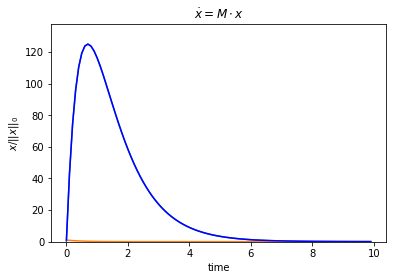

In [1]:
import numpy as np
import kreisspy as kp
A = [[-1,500],[0,-2]]
kp.plot(np.arange(0,10,.1),A,[0,.1])

Here we see a massive amplification of the initial conditions, although the eigenvalues would suggest exponential decay. What is happening? The answer is that any non-normal matrix $\boldsymbol{A}$ (such that $\boldsymbol{A}\boldsymbol{A}^T \neq \boldsymbol{A}^T\boldsymbol{A}$) will give a transient response as the system relaxes back down to the (non-orthogonal) eigendirection.

Such transients can be classified in terms of the spectral abcissa (eigenvalue(s) with maximal real component) $\alpha (\boldsymbol{A})$ which determines the long term behaviour, the numerical abcissa (eigenvalues of $\frac{1}{2}(\boldsymbol{A}+\boldsymbol{A}^T)$) $\omega (\boldsymbol{A})$, the Kreiss constant $\mathcal{K}(\boldsymbol{A})$ which gives a lower bound to the transient behaviour (the upper bound is given by $eN\mathcal{K}(\boldsymbol{A})$ where $N$ is the matrix dimensionality), and the time over which the transient occurs $\tau=\log(\mathcal{K})/a$ where $a$ is the real part of the maximal pseudoeigenvalue.

These quantities can be found using the `characterize_transient` function in KreissPy:

/home/ab/python/anaconda3/lib/python3.6/site-packages/kreisspy/plots.py:37: RuntimeWarning: overflow encountered in exp
  ax.plot(t_trunc,np.exp(mc[1]*t_trunc),"--",color="orange")
/home/ab/python/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


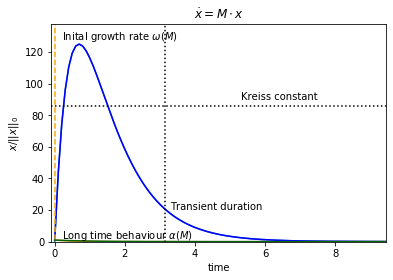

In [3]:
import matplotlib.pyplot as plt
kp.plot(np.arange(0, 20,0.1), A, [0,1],  matrix_characteristic=True)
plt.annotate(r'Long time behaviour $\alpha (M)$',[1,1], [.2,2])
plt.annotate(r'Inital growth rate $\omega (M)$',[1,35], [.2,128])
plt.annotate(r'Transient duration',[3.4,20], [3.3,20])
plt.annotate(r'Kreiss constant',[3.4,26], [5.3,90])
plt.savefig("fig1.png")